In [21]:
'''
Description: There is a description
Author: ShAn_3003
version: 1.0
Date: 2023-12-01 17:02:34
LastEditors: ShAn_3003
LastEditTime: 2023-12-07 21:05:35
'''
import os
import random

xml_path = "VOC_Data\\train_location"
split_path = "YOLO_Data\\train-val-split"
if not os.path.exists(split_path):
    os.makedirs(split_path)
all_xml = os.listdir(xml_path)
all_index = range(len(all_xml))
train_val_percent= 1.0
train_percent = 0.9
train_val_num = int(len(all_xml)*train_val_percent)
train_num = int(len(all_xml)*train_percent)
train_val_index = random.sample(all_index,train_val_num)
train_index = random.sample(train_val_index,train_num)

 
file_trainval = open(split_path + '/trainval.txt', 'w')
file_test = open(split_path + '/test.txt', 'w')
file_train = open(split_path + '/train.txt', 'w')
file_val = open(split_path + '/val.txt', 'w')
 
for i in all_index:
    name = all_xml[i][:-4] + '\n'
    if i in train_val_index:
        file_trainval.write(name)
        if i in train_index:
            file_train.write(name)
        else:
            file_val.write(name)
    else:
        file_test.write(name)
 
file_trainval.close()
file_train.close()
file_val.close()
file_test.close()

In [22]:
# -*- coding: utf-8 -*-
import xml.etree.ElementTree as ET
import os
from os import getcwd
 
sets = ['train', 'val', 'test']
classes = ["Fovea"]   # 改成自己的类别
abs_path = os.getcwd()
print(abs_path)

d:\Desktop\ML_Detection


In [23]:
def convert(size, box):
    dw = 1. / (size[0])
    dh = 1. / (size[1])
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return x, y, w, h

if not os.path.exists(abs_path+'\YOLO_Data\labels'):
        os.makedirs(abs_path+'\YOLO_Data\labels')
        


In [24]:
def convert_annotation(image_id):
    in_file = open(xml_path+'/%s.xml' % (image_id), encoding='UTF-8')
    out_file = open(abs_path+'/YOLO_Data/labels/%s.txt' % (image_id), 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult) == 1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text),
             float(xmlbox.find('ymax').text))
        b1, b2, b3, b4 = b
        # 标注越界修正
        if b2 > w:
            b2 = w
        if b4 > h:
            b4 = h
        b = (b1, b2, b3, b4)
        bb = convert((w, h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')
    out_file.close()

for image_set in sets:
    image_ids = open(split_path+'/%s.txt' % (image_set)).read().strip().split()
    list_file = open(abs_path+'\YOLO_Data/%s.txt' % (image_set), 'w')
    for image_id in image_ids:
        list_file.write("VOC_Data/train/%s.jpg\n" % (image_id))
        convert_annotation(image_id)
    list_file.close()

In [7]:
from PIL import Image
import os
import shutil

sets = ['train', 'val', 'test']
dis_dir = "YOLO_Data"
ori_dir = "VOC_Data"

for set in sets:
    data_root = os.path.join(dis_dir, set)
    if not os.path.exists(data_root):
        os.makedirs(data_root)
        os.makedirs(os.path.join(data_root, "images"))
        os.makedirs(os.path.join(data_root, "labels"))

    file_paths = open(os.path.join(dis_dir, '%s.txt' % set)).read().strip().split()
    image_ids = []

    for image_path in file_paths:
        image_name = os.path.basename(image_path)
        image_id, _ = os.path.splitext(image_name)
        image_ids.append(image_id)
        img = Image.open(image_path)

        # Save the image in the "images" directory
        img.save(os.path.join(data_root, "images", image_name))

    for image_id in image_ids:
        for label in os.listdir(os.path.join(dis_dir, "labels")):
            label_id, _ = os.path.splitext(label)

            if label_id == image_id:
                # Move the label file to data_root/labels
                label_src_path = os.path.join(dis_dir, "labels", label)
                label_dst_path = os.path.join(data_root, "labels", label)
                shutil.move(label_src_path, label_dst_path)


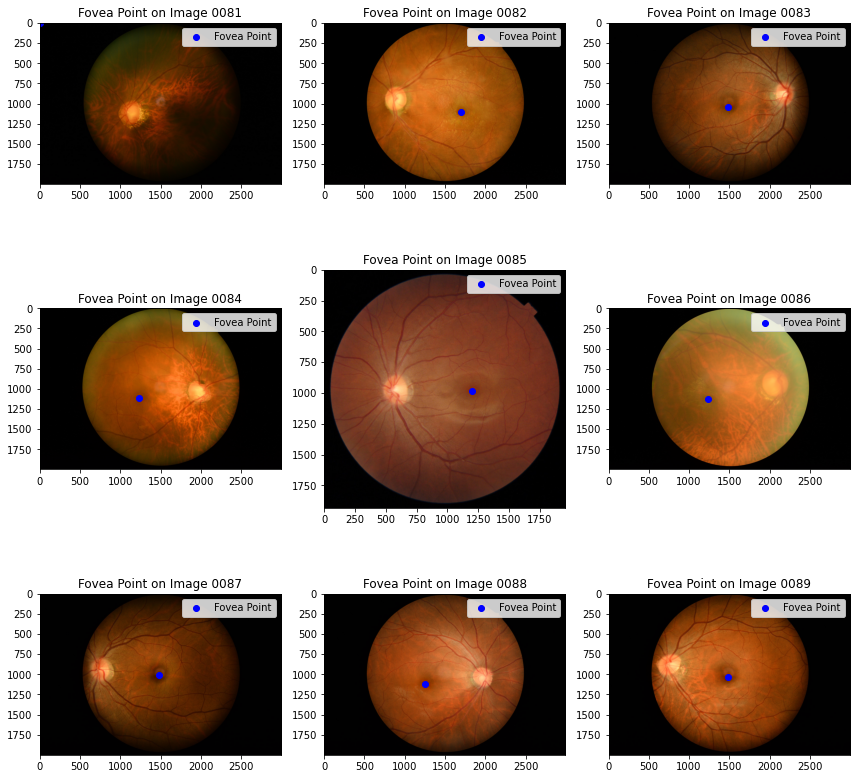

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取CSV文件
df = pd.read_csv("output (1).csv")

# 图像文件夹路径
image_folder = "YOLO_Data\\test\\images"

# 获取图像文件夹中的前9张图像路径
image_paths = os.listdir(image_folder)[:9]

# 设置子图布局为3行3列
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# 遍历前9张图像
for i, image_path in enumerate(image_paths):
    # 提取图像ID
    image_id, _ = os.path.splitext(image_path)
    imageid = int(image_id)

    # 根据图像ID获取对应的Fovea点坐标
    fovea_x = df[df["ImageID"] == f'{imageid}_Fovea_X']['value'].values
    fovea_y = df[df["ImageID"] == f'{imageid}_Fovea_Y']['value'].values

    if len(fovea_x) > 0 and len(fovea_y) > 0:
        fovea_x = float(fovea_x[0])
        fovea_y = float(fovea_y[0])

        # 读取图像并显示在对应的子图上
        img_path = os.path.join(image_folder, image_path)
        img = mpimg.imread(img_path)

        row, col = divmod(i, 3)
        axes[row, col].imshow(img)
        axes[row, col].scatter(fovea_x, fovea_y, color='blue', marker='o', label='Fovea Point')
        axes[row, col].set_title(f'Fovea Point on Image {image_id}')
        axes[row, col].legend()
    else:
        print(f'Fovea coordinates not found for image {image_id}')

# 调整子图布局
plt.tight_layout()
plt.show()


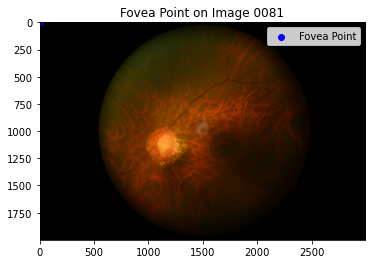

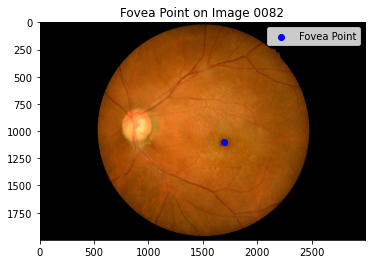

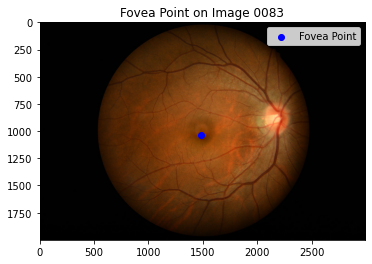

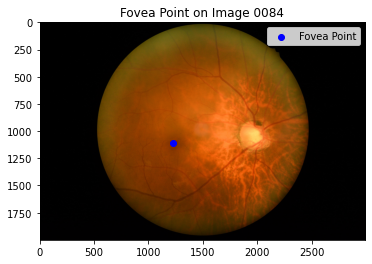

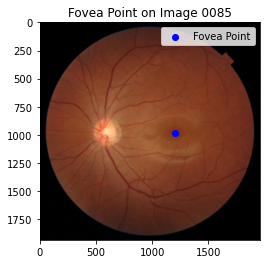

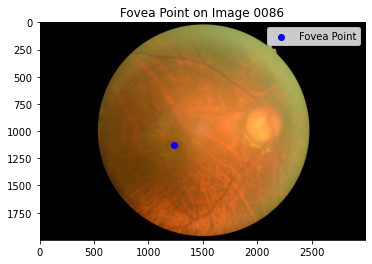

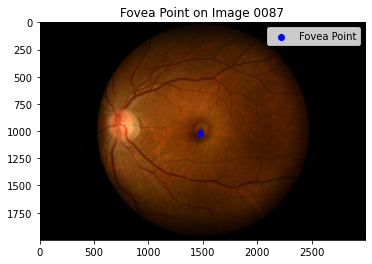

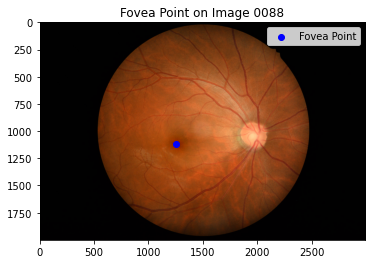

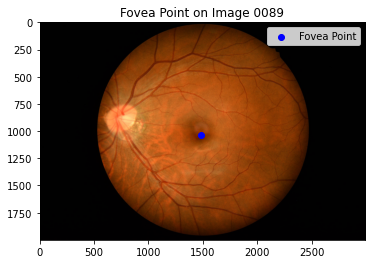

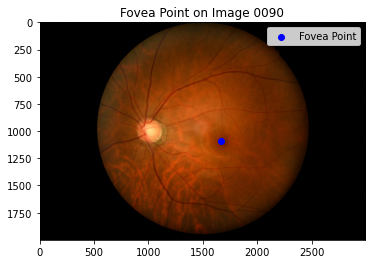

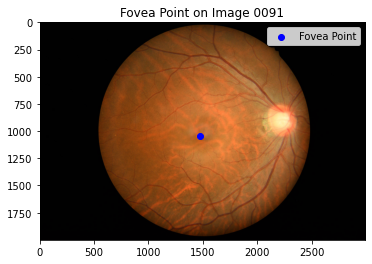

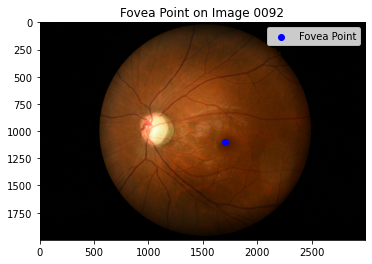

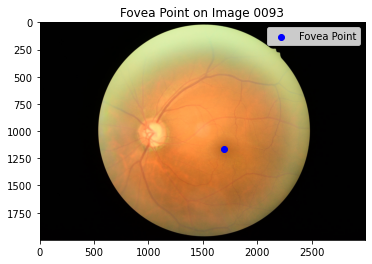

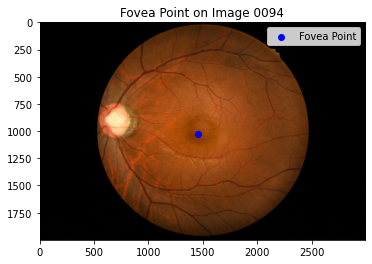

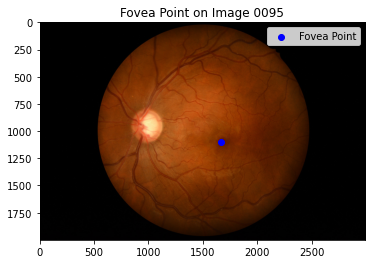

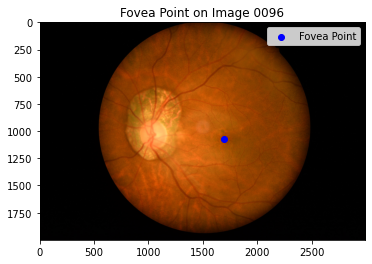

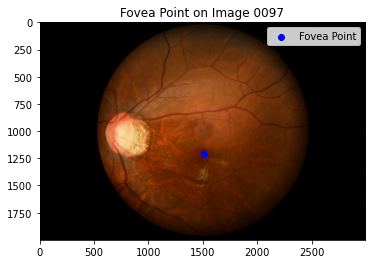

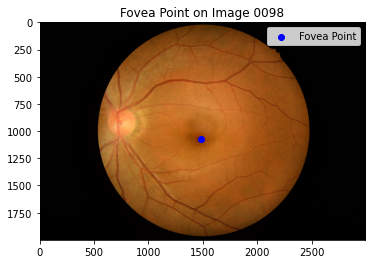

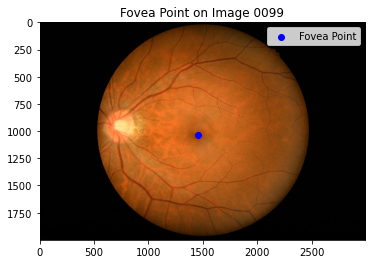

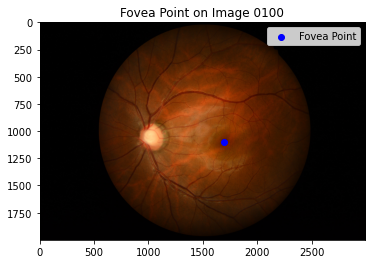

In [13]:
import os
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取CSV文件
df = pd.read_csv("output (1).csv")

# 图像文件夹路径
image_folder = "YOLO_Data\\test\\images"

# 遍历图像文件夹中的每个图像
for image_path in os.listdir(image_folder):
    # 提取图像ID
    image_id, _ = os.path.splitext(image_path)
    imageid = int(image_id)

    # 根据图像ID获取对应的Fovea点坐标
    fovea_x = df[df["ImageID"] == f'{imageid}_Fovea_X']['value'].values
    fovea_y = df[df["ImageID"] == f'{imageid}_Fovea_Y']['value'].values

    if len(fovea_x) > 0 and len(fovea_y) > 0:
        fovea_x = float(fovea_x[0])
        fovea_y = float(fovea_y[0])

        # 读取图像并显示
        img_path = os.path.join(image_folder, image_path)
        img = mpimg.imread(img_path)

        # 在图像上画出Fovea点
        plt.imshow(img)
        plt.scatter(fovea_x, fovea_y, color='blue', marker='o', label='Fovea Point')
        plt.title(f'Fovea Point on Image {image_id}')
        plt.legend()
        plt.show()
    else:
        print(f'Fovea coordinates not found for image {image_id}')
